# Some important (high-level) considerations

In applying any machine learning algorithms to a dataset, several considerations are crucial.  This supplementary document covers some of the basic steps in making choices that matter to your problem.



## Learning algorithms

### Supervised learning
To model relationships and dependencies between input and output.

**Regression**

For example, can we predict the mass of a penguin given its other characteristics?

In [2]:
import seaborn as sns
import pandas as pd
sns.set_palette('bright')

penguins = sns.load_dataset('penguins')
penguins = penguins[~penguins.isna().any(axis='columns')]
penguins = penguins.sort_values('flipper_length_mm')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

X = penguins[['flipper_length_mm']]
y = penguins['body_mass_g']

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
print(f"Linear Regression RMSE: {root_mean_squared_error(y, y_pred_lr)}")

# Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=300)
knn.fit(X, y)
y_pred_knn = knn.predict(X)
print(f"Nearest Neighbors RMSE: {root_mean_squared_error(y, y_pred_knn)}")

# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
y_pred_rf = rf.predict(X)
print(f"Random Forest RMSE: {root_mean_squared_error(y, y_pred_rf)}")

Linear Regression RMSE: 392.1602706380618
Nearest Neighbors RMSE: 719.5471408610105
Random Forest RMSE: 345.47914963289435


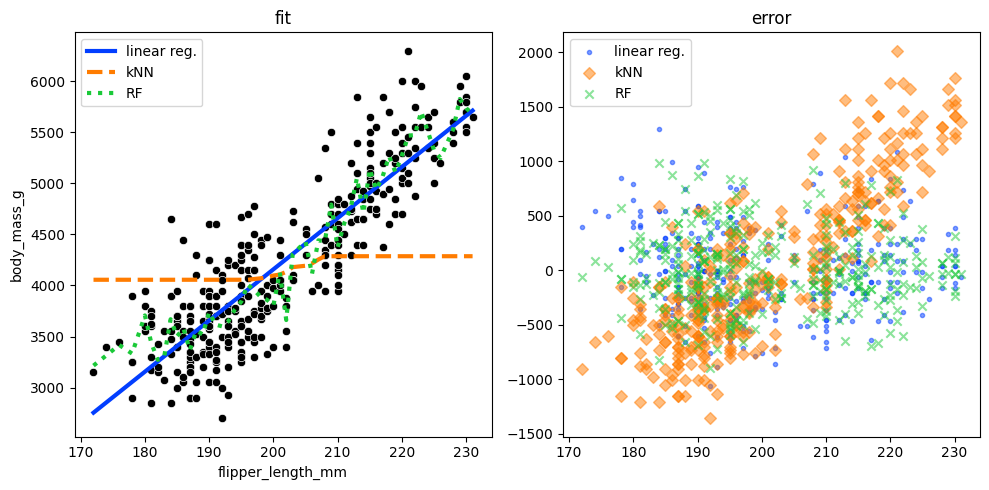

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax[0])

y_preds = [y_pred_lr, y_pred_knn, y_pred_rf]
labels = ['linear reg.', 'kNN', 'RF']
linestyles = ['-', '--', ':']
markerstyles = ['.', 'D', 'x']

for j, y_pred in enumerate(y_preds):
    ax[0].plot(X, y_pred, label=labels[j], linestyle=linestyles[j], linewidth=3)
    ax[1].scatter(X, y - y_pred, label=labels[j], marker=markerstyles[j], alpha=0.5)
ax[0].set_title('fit')
ax[1].set_title('error')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

**Classification**

For example, can we predict where a penguin lives given its other characteristics?

In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Define inputs and outputs
penguins = penguins.sample(frac=1)
X = penguins.drop("island", axis=1)
y = penguins["island"]

# Encode categorical variables
enc = LabelEncoder()
y = enc.fit_transform(y)
X = pd.get_dummies(X)

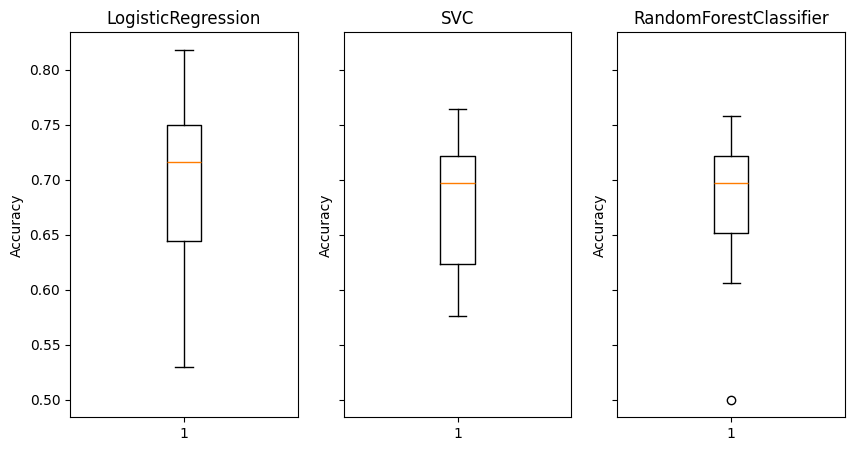

In [17]:
models = [LogisticRegression, SVC, RandomForestClassifier]

fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')

### Unsupervised learning
To identify structure or relationships.

**Clustering**

For example, can we group the penguins to identify the species using their characteristics?

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [19]:
# Define input and output
X = penguins.drop(["species", "island", 'sex'], axis=1)
y = penguins["species"]

# Encode categorical variables
enc = LabelEncoder()
y = enc.fit_transform(y)

In [20]:
m = KMeans(n_clusters=3)
m.fit(X)
y_pred = m.predict(X)
penguins['species_pred'] = y_pred

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

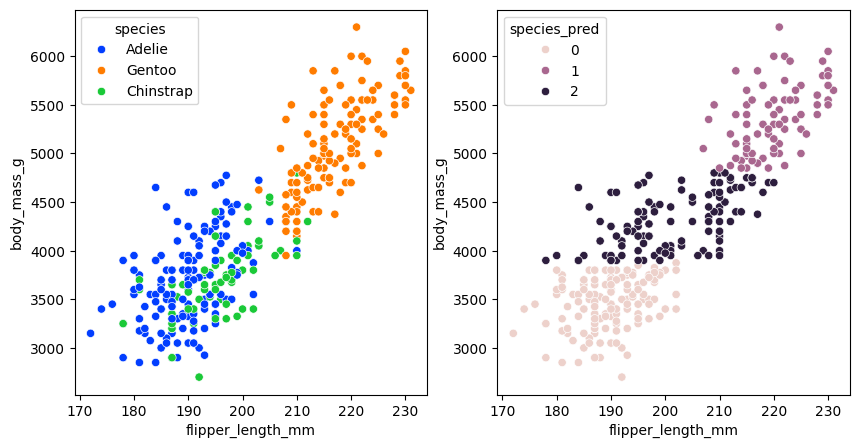

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins, ax=ax[0])
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species_pred', data=penguins, ax=ax[1])

### Semi-supervised learning
Some outputs are "labeled", most are not, typically in classification problems.

```{figure} ../img/ex-semi-supervised.png
---
width: 80%
name: ex-semi-supervised
---
Example of a semi-supervised learning model {cite:p}`berthelot2019mixmatch`.
```

### Reinforcement learning
The algorithm learns by acting and observing reward.  The goal is to identify an "optimal" policy.

```{figure} ../img/reinforcement-learning.png
---
width: 70%
name: reinforcement
---
Generic modeling of a reinforcement learning model.
```

# Practice: diamonds dataset
Consider the `diamonds` dataset.  Specifically, investigate the relationship between `price` and other variables in the dataset.

**Qualitative**
Answer the modeling process questions:

1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

**Quantitative**

1. Choose two supervised learning models to predict price.
2. Describe the differences between the chosen models.
3. How well does each model perform?  Conduct a 10-fold cross validation and report the training and testing performance.

In [23]:
import sklearn
print(sklearn.__version__)

import seaborn as sns

diamonds = sns.load_dataset('diamonds')

1.4.0


# Training, testing, and validation

A brief word through https://mlu-explain.github.io/train-test-validation/.

# Regularization and hyperparameter tuning

Example: with a linear regression base.

Lasso ($\ell_1$):

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

Ridge ($\ell_2$):

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha ||w||_2 ^ 2}$$
Elastic Net:

$$\min_{w} { \frac{1}{2n} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

In [ ]:
from sklearn.linear_model import lasso_path, enet_path

X = penguins.drop(['body_mass_g'], axis=1)
X = pd.get_dummies(X)

y = penguins['body_mass_g']

# print("Computing regularization path using the lasso...")
eps = 5e-4
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

In [ ]:
import numpy as np 
from itertools import cycle

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")

# Multi-layer ReLU network as an example
Discussion on Section 1.1 in [Nonparametric regression on low-dimensional manifolds using deep ReLU networks.](https://watermark.silverchair.com/iaac001.pdf)